# Multiple Comparisons Homework

## Notes on Definitions
* performing multiple statistical tests at once greatly increases the chance of false positives
* if your alpha = 0.05 --> 5% chance of a false positive
* BUT, if you run 20 tests, each with a 5% error rate, your p(false positive) increases greatly
    * becomes 64% probability of 1 false positive across 20 independent tests

## Example

Text(0.5, 1.0, 'Probability of at least one Type I error in N tests')

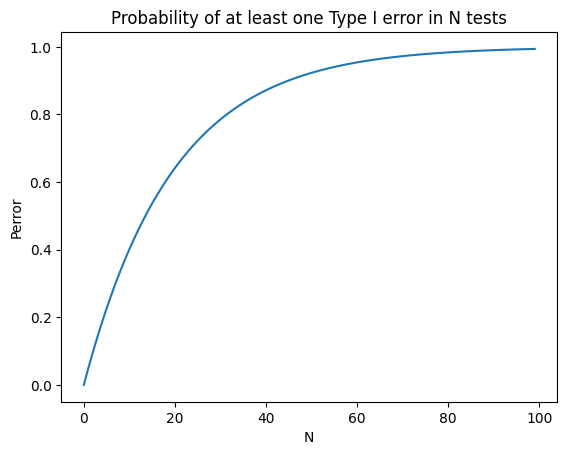

In [1]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05
N = np.arange(0,100)
plt.plot(N, 1-(1-alpha)**N)
plt.xlabel('N')
plt.ylabel('Perror')
plt.title('Probability of at least one Type I error in N tests')

## Notes on Corrections
many methods exist for correcting for multiple comparisons

### Bonferroni Correction
* simplest correction for Type I error (false positive)
* divide alpha by the number of comparisons
* conservative test, used when number of comparisons is small and you want to avoud Type I errors

### Benjamini-Hochberg Procedure
* more careful approach
Procedure:
1) rank p-values in ascending order as i = 1...n
2) calculate a critical value for each p-val
    (i/n)Q
    i = rank
    n = total number of tests
    Q = false discovery rate (you choose this -- usually 0.05)
3) in rank-ordered p-values, find the largest p-value that is smaller than it's associated critical value, **and use this are your new p-value** (i.e., reject null for all cases in which p <= this p-value)

## Exercise
### First
simulate 1000 t-tests comparing two samples with equal means and standard deviations, and save the p-values

### Second
apply Bonferroni Correction and Benajamini-Hochberg Procedure to address multiple comparisons problem

### Third
set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?

Number of significant results (p < 0.05): 53


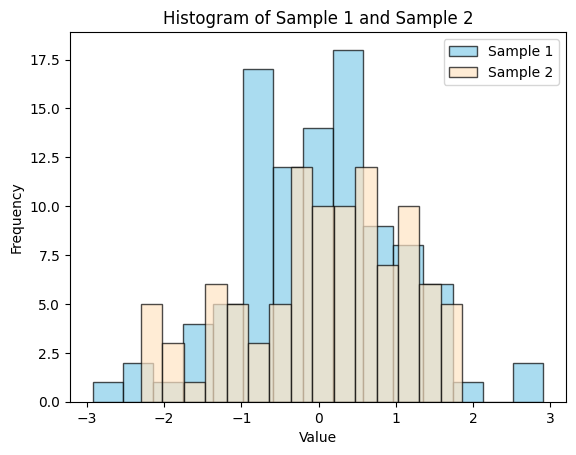

In [13]:
### FIRST (simulate 1000 t-tests)

from scipy.stats import ttest_ind

np.random.seed(0)
p_values = []   # store p-values here
for _ in range(1000):   # simulate 1000 t-tests
    sample1 = np.random.normal(loc=0, scale=1, size=100) # both samples have same mean and std
    sample2 = np.random.normal(loc=0, scale=1, size=100)
    _, p = ttest_ind(sample1, sample2) # perform t-test
    p_values.append(p) # store p-value
p_values = np.array(p_values) # convert to numpy array for easier handling
print(f"Number of significant results (p < {alpha}): {np.sum(p_values < alpha)}")

plt.hist(sample1, bins=15, alpha=0.7, label='Sample 1', color='skyblue', edgecolor='black')
plt.hist(sample2, bins=15, alpha=0.7, label='Sample 2', color='bisque', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample 1 and Sample 2')
plt.legend()
plt.show()


In [ ]:
### SECOND (apply Bonferroni Correction and Benajamini-Hochberg Procedure)
# Bonferroni Correction
bonferroni_alpha = alpha / len(p_values)
significant_bonferroni = p_values < bonferroni_alpha
print(f"Bonferroni corrected alpha: {bonferroni_alpha}")
print(f"Number of significant results after Bonferroni correction: {np.sum(significant_bonferroni)}")


# Benjamini-Hochberg Procedure
Q = 0.05  # desired false discovery rate
n = len(p_values)   # number of tests
sorted_indices = np.argsort(p_values)   # indices that would sort the p-values
sorted_pvals = p_values[sorted_indices] # sorted p-values
bh_critical_values = (np.arange(1, n + 1) / n) * Q # BH critical values

# Find the largest p-value where p <= critical value
below = sorted_pvals <= bh_critical_values # boolean array for p-values below critical values
if np.any(below):
    max_idx = np.where(below)[0].max()  # index of largest p-value below critical value
    bh_threshold = sorted_pvals[max_idx] # BH threshold
    significant_bh = p_values <= bh_threshold # boolean array for significant p-values
else:
    bh_threshold = None     # no p-values below critical values
    significant_bh = np.zeros_like(p_values, dtype=bool)    # no significant p-values

print(f"Benjamini-Hochberg threshold: {bh_threshold}")
print(f"Number of significant results after Benjamini-Hochberg: {np.sum(significant_bh)}")

Bonferroni corrected alpha: 5e-05
Number of significant results after Bonferroni correction: 0
Benjamini-Hochberg threshold: None
Number of significant results after Benjamini-Hochberg: 0


Number of significant results (p < 0.05): 1000


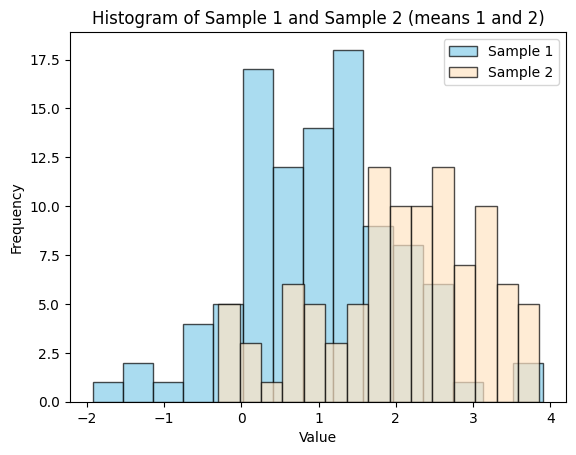

In [ ]:
### THIRD (set means to 1 and 2, re-run)

np.random.seed(0)
p_values = []
for _ in range(1000):
    sample1 = np.random.normal(loc=1, scale=1, size=100)
    sample2 = np.random.normal(loc=2, scale=1, size=100)
    _, p = ttest_ind(sample1, sample2)
    p_values.append(p)
p_values = np.array(p_values)
print(f"Number of significant results (p < {alpha}): {np.sum(p_values < alpha)}")

plt.hist(sample1, bins=15, alpha=0.7, label='Sample 1', color='skyblue', edgecolor='black')
plt.hist(sample2, bins=15, alpha=0.7, label='Sample 2', color='bisque', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample 1 and Sample 2 (means 1 and 2)')
plt.legend()
plt.show()

# Bonferroni Correction
bonferroni_alpha = alpha / len(p_values)
significant_bonferroni = p_values < bonferroni_alpha
print(f"Bonferroni corrected alpha: {bonferroni_alpha}")
print(f"Number of significant results after Bonferroni correction: {np.sum(significant_bonferroni)}")

# Benjamini-Hochberg Procedure
Q = 0.05  # desired false discovery rate
n = len(p_values)
sorted_indices = np.argsort(p_values)
sorted_pvals = p_values[sorted_indices]
bh_critical_values = (np.arange(1, n + 1) / n) * Q

# Find the largest p-value where p <= critical value
below = sorted_pvals <= bh_critical_values
if np.any(below):
    max_idx = np.where(below)[0].max()
    bh_threshold = sorted_pvals[max_idx]
    significant_bh = p_values <= bh_threshold
else:
    bh_threshold = None
    significant_bh = np.zeros_like(p_values, dtype=bool)

print(f"Benjamini-Hochberg threshold: {bh_threshold}")
print(f"Number of significant results after Benjamini-Hochberg: {np.sum(significant_bh)}")